In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split

In [30]:
with_mask_files=os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [31]:
without_mask_files=os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [32]:
print("Number of with mask images",len(with_mask_files))
print("Number of without mask images",len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


`Creating labels for the two class of Images`

`with mask` -> 1
`without mask` -> 0

In [33]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

labels = with_mask_labels + without_mask_labels

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\jyoti\AppData\Local\Temp\ipykernel_17212\324215673.py:1: SyntaxWarning: invalid escape sequence '\w'
  img=mpimg.imread('data\with_mask\with_mask_1.jpg')


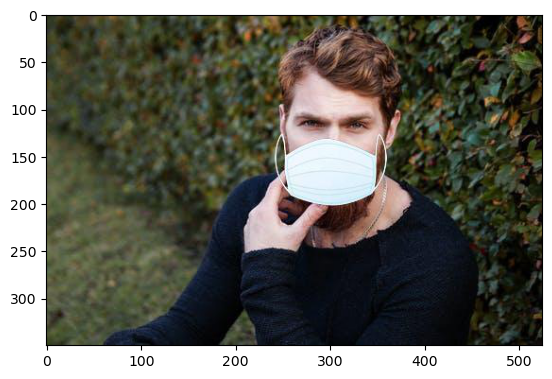

In [34]:
img=mpimg.imread('data\with_mask\with_mask_1.jpg')
imgplot=plt.imshow(img)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\jyoti\AppData\Local\Temp\ipykernel_17212\1778026583.py:1: SyntaxWarning: invalid escape sequence '\w'
  img=mpimg.imread('data\without_mask\without_mask_1.jpg')


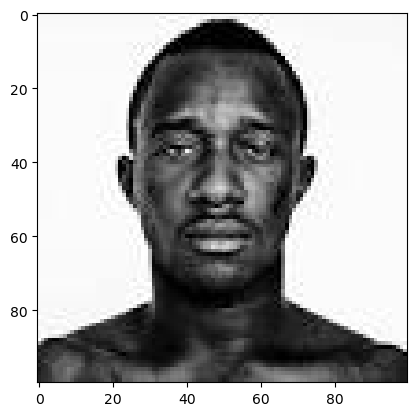

In [35]:
img=mpimg.imread('data\without_mask\without_mask_1.jpg')
imgplot=plt.imshow(img)

Image processing  

In [36]:
with_mask_path='data/with_mask/'
data=[]

for img_file in with_mask_files:
    image=Image.open(with_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

without_mask_path='data/without_mask/'

for img_file in without_mask_files:
    image=Image.open(without_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)



C:\Users\jyoti\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [37]:
len(data)

7553

In [38]:
data

[array([[[50, 58, 31],
         [46, 54, 34],
         [56, 59, 42],
         ...,
         [26, 32, 25],
         [29, 33, 18],
         [34, 40, 16]],
 
        [[47, 55, 30],
         [49, 57, 37],
         [59, 63, 40],
         ...,
         [18, 21, 11],
         [38, 42, 31],
         [31, 41, 22]],
 
        [[52, 58, 37],
         [50, 59, 38],
         [59, 64, 36],
         ...,
         [45, 44, 30],
         [29, 35, 28],
         [20, 30, 17]],
 
        ...,
 
        [[63, 72, 37],
         [66, 76, 41],
         [74, 84, 50],
         ...,
         [ 5,  4,  0],
         [20, 19, 15],
         [17, 17, 12]],
 
        [[59, 71, 34],
         [60, 70, 39],
         [68, 76, 50],
         ...,
         [16, 15, 12],
         [15, 13, 10],
         [13,  9,  7]],
 
        [[53, 69, 29],
         [54, 64, 37],
         [57, 63, 43],
         ...,
         [18, 18, 16],
         [16, 13, 12],
         [20, 12, 13]]], dtype=uint8),
 array([[[115,  61,  15],
         [121,  

In [39]:
type(data[0])

numpy.ndarray

In [40]:
data[0].shape

(128, 128, 3)

In [41]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [42]:
X=np.array(data)
y=np.array(labels)

In [43]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)


In [54]:
X.shape,y.shape

((7553, 128, 128, 3), (7553,))

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,
                                              random_state=42)

In [56]:
X_train.shape,X_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3))

In [60]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [62]:
X_train[100]

array([[[212, 218, 191],
        [210, 217, 187],
        [207, 214, 181],
        ...,
        [248, 247, 246],
        [252, 252, 253],
        [252, 254, 253]],

       [[213, 219, 193],
        [211, 218, 189],
        [208, 215, 183],
        ...,
        [247, 245, 245],
        [252, 252, 253],
        [252, 254, 253]],

       [[214, 220, 197],
        [212, 218, 193],
        [209, 215, 188],
        ...,
        [244, 243, 242],
        [251, 251, 252],
        [252, 254, 253]],

       ...,

       [[229, 196, 202],
        [222, 190, 198],
        [233, 203, 214],
        ...,
        [206, 138, 109],
        [189, 120,  98],
        [171, 102,  90]],

       [[238, 207, 218],
        [235, 206, 217],
        [239, 210, 223],
        ...,
        [215, 150, 123],
        [204, 132, 108],
        [194, 118, 100]],

       [[236, 210, 211],
        [240, 218, 217],
        [242, 222, 223],
        ...,
        [216, 149, 132],
        [209, 140, 119],
        [205, 132, 108]]

In [63]:
X_train_scaled[100]

array([[[0.83137255, 0.85490196, 0.74901961],
        [0.82352941, 0.85098039, 0.73333333],
        [0.81176471, 0.83921569, 0.70980392],
        ...,
        [0.97254902, 0.96862745, 0.96470588],
        [0.98823529, 0.98823529, 0.99215686],
        [0.98823529, 0.99607843, 0.99215686]],

       [[0.83529412, 0.85882353, 0.75686275],
        [0.82745098, 0.85490196, 0.74117647],
        [0.81568627, 0.84313725, 0.71764706],
        ...,
        [0.96862745, 0.96078431, 0.96078431],
        [0.98823529, 0.98823529, 0.99215686],
        [0.98823529, 0.99607843, 0.99215686]],

       [[0.83921569, 0.8627451 , 0.77254902],
        [0.83137255, 0.85490196, 0.75686275],
        [0.81960784, 0.84313725, 0.7372549 ],
        ...,
        [0.95686275, 0.95294118, 0.94901961],
        [0.98431373, 0.98431373, 0.98823529],
        [0.98823529, 0.99607843, 0.99215686]],

       ...,

       [[0.89803922, 0.76862745, 0.79215686],
        [0.87058824, 0.74509804, 0.77647059],
        [0.91372549, 0

## Building a Convolutional Neural Network

In [64]:
import tensorflow as tf
from tensorflow import keras


In [69]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [70]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [71]:
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 216ms/step - acc: 0.8039 - loss: 0.4539 - val_acc: 0.8645 - val_loss: 0.3035
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 35s 207ms/step - acc: 0.8906 - loss: 0.2840 - val_acc: 0.8810 - val_loss: 0.2631
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 35s 206ms/step - acc: 0.9073 - loss: 0.2343 - val_acc: 0.9140 - val_loss: 0.2249
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 35s 206ms/step - acc: 0.9257 - loss: 0.1784 - val_acc: 0.9074 - val_loss: 0.2331
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 35s 205ms/step - acc: 0.9371 - loss: 0.1533 - val_acc: 0.9124 - val_loss: 0.2234


In [72]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print('Test accuracy',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.9246 - loss: 0.2366
Test accuracy 0.9245532751083374


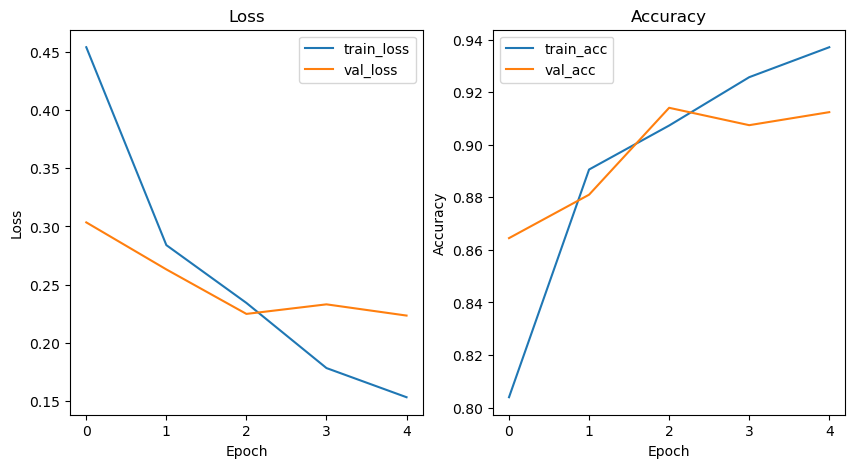

In [73]:
h = history
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(h.history['acc'], label='train_acc')
plt.plot(h.history['val_acc'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()


In [75]:
input_image_path = input('Path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)

# Show the image correctly
cv2.imshow("Input Image", input_image)
cv2.waitKey(0)            # Correct function name
cv2.destroyAllWindows()

# Preprocessing
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Prediction
input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)

# Output
if input_pred_label == 1:
    print("The person is wearing a mask")
else:
    print("The person is not wearing a mask")

Path of the image to be predicted :  data\with_mask\with_mask_1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The person is wearing a mask


In [77]:
model.save('mask_detection_model.h5')